In [ ]:
!pip install pandas
!pip install numpy
!pip install sklearn
!pip install matplotlib
!pip install scikit-learn

In [1]:
import pandas as pd
import numpy as np

In [2]:
original = pd.read_excel("Reduced Features for TAI project.xlsx")

In [3]:
original

,Patient ID,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,...,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum,Label
0,1,0.661690,2.817688,0.769536,7.257078,3381.734540,3715.077716,3546.818663,634.748331,6.682128,...,4005.210235,0.408974,2.949406,0.231474,0.473838,1.572473,0.983853,0.875074,142.866201,0
1,1,0.750849,2.084800,0.442780,3.137745,2653.808184,1443.697357,2297.305200,616.359443,4.095513,...,32.058217,0.282009,2.790798,0.010531,0.401979,1.178144,0.905124,0.696716,21.693040,0
2,1,0.619781,2.590759,0.384512,7.005413,3551.125894,3568.780890,3342.865490,426.661231,8.535867,...,63032.030205,0.442902,3.211156,0.276207,0.446076,1.615550,0.993054,0.832938,163.039718,0
3,2,0.388733,2.932863,0.738215,2.178815,1564.039548,1370.065913,1839.930320,318.122386,1.939531,...,147.649047,0.330143,3.054401,0.023870,0.399957,1.306885,0.911141,0.727764,22.979554,0
4,2,0.820531,2.814081,0.773252,1.316850,1377.981413,1005.602230,1164.799257,325.473446,1.726775,...,65.872763,0.278449,2.074076,0.016973,0.350459,1.165727,0.906515,0.606753,24.490320,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557,96,0.225097,3.145095,0.887252,0.507042,113.521739,63.289855,158.304348,21.194707,0.420766,...,22.156250,0.148424,2.383944,0.025038,0.236198,1.412431,0.924402,0.649229,27.270149,1
3558,96,0.503842,2.484876,0.655281,4.641217,2475.349595,2771.461923,2684.326511,574.123960,4.591888,...,450.172765,0.403421,3.311709,0.546492,0.400437,1.494975,0.992242,0.734152,288.610250,1
3559,96,0.454726,3.363199,1.026167,6.014596,3310.430153,1430.379898,3536.925043,548.184562,5.595325,...,336.564815,0.114790,3.124013,0.028680,0.319474,1.609656,0.895515,0.566488,14.823064,1
3560,96,0.624101,2.205947,0.349004,1.626775,921.056338,280.690141,1045.957746,148.842690,1.583895,...,14.416448,0.131801,2.174953,0.072674,0.254557,1.280580,0.895171,0.542009,15.171972,1


In [4]:
original.isna().sum().sum() 

0

In [5]:
original = original.T.drop_duplicates().T

The dataset has no NAN values.

In [6]:
original["Patient ID"][0]

1.0

In [7]:
print(original["Patient ID"].value_counts())

34.0    342
9.0     141
36.0    138
71.0    132
42.0    129
       ... 
95.0      3
1.0       3
91.0      2
87.0      1
81.0      1
Name: Patient ID, Length: 96, dtype: int64


Some partients have the same rows as the test part. 

We notice here that some patients have alot of data compared to other patients. For example patient number '34' has 342 rows of data whereas patient '81' has only 1 row of data. So we need to balance the data.

We can see that the data from the 96 patients is balanced (46 Negative cases to 50 Negative cases)

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [9]:
neg = []
pos = []

for i in range(len(original)):
    if original["Label"][i] == 0:
        neg.append(original.iloc[i])
    else:
        pos.append(original.iloc[i])

In [10]:
dfneg = pd.DataFrame(neg)

In [11]:
dfneg[["Patient ID", "Label"]] = dfneg[["Patient ID", "Label"]].astype(int)

In [12]:
dfneg

,Patient ID,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,...,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum,Label
0,1,0.661690,2.817688,0.769536,7.257078,3381.734540,3715.077716,3546.818663,634.748331,6.682128,...,4005.210235,0.408974,2.949406,0.231474,0.473838,1.572473,0.983853,0.875074,142.866201,0
1,1,0.750849,2.084800,0.442780,3.137745,2653.808184,1443.697357,2297.305200,616.359443,4.095513,...,32.058217,0.282009,2.790798,0.010531,0.401979,1.178144,0.905124,0.696716,21.693040,0
2,1,0.619781,2.590759,0.384512,7.005413,3551.125894,3568.780890,3342.865490,426.661231,8.535867,...,63032.030205,0.442902,3.211156,0.276207,0.446076,1.615550,0.993054,0.832938,163.039718,0
3,2,0.388733,2.932863,0.738215,2.178815,1564.039548,1370.065913,1839.930320,318.122386,1.939531,...,147.649047,0.330143,3.054401,0.023870,0.399957,1.306885,0.911141,0.727764,22.979554,0
4,2,0.820531,2.814081,0.773252,1.316850,1377.981413,1005.602230,1164.799257,325.473446,1.726775,...,65.872763,0.278449,2.074076,0.016973,0.350459,1.165727,0.906515,0.606753,24.490320,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,46,0.577087,2.603525,0.710759,6.556231,2896.170217,2142.948016,3388.937854,485.392841,5.569620,...,220.845578,0.146085,3.380679,0.036039,0.370779,1.402542,0.895293,0.667424,21.795029,0
2016,46,0.907373,1.822670,0.173061,7.887598,3628.381862,2428.119023,3596.726294,533.588966,9.443781,...,10.746221,0.157173,3.605559,0.048991,0.390818,2.006712,0.892271,0.702332,25.016651,0
2017,46,0.642163,2.459737,0.688368,0.654063,87.486486,144.351351,271.000000,8.420745,0.407397,...,5.858770,0.395420,2.430561,0.070254,0.156133,1.148375,0.983085,1.055117,110.600405,0
2018,46,0.680525,2.152316,0.495054,5.743015,3055.746041,2036.252786,3182.018573,605.873446,5.728189,...,1.439775,0.249950,3.498572,0.075893,0.326827,1.203721,0.907640,0.599508,34.910723,0


In [13]:
dfpos = pd.DataFrame(pos)
dfpos[["Patient ID", "Label"]] = dfpos[["Patient ID", "Label"]].astype(int)

In [14]:
dfpos

,Patient ID,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,...,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum,Label
2020,47,0.416225,2.521806,0.439906,0.533505,138.849057,90.132075,187.377358,26.008544,0.529860,...,49.375000,0.118690,2.362302,0.038090,0.167263,1.279397,0.895734,0.377417,18.605135,1
2021,47,0.736010,2.173015,0.483420,0.552986,166.500000,63.500000,185.642857,10.250000,0.521358,...,6.466722,0.403556,2.315923,0.019693,0.824728,1.058369,0.943474,2.449881,52.971706,1
2022,47,0.641362,3.087188,0.909156,0.956684,241.235294,251.742081,587.461538,47.635143,0.500438,...,20.771146,0.610023,3.151656,0.093560,1.928797,1.295517,0.944976,3.136327,71.439527,1
2023,47,0.664107,3.407474,1.054132,2.226909,631.497549,116.884804,1560.713235,163.114595,1.015119,...,0.345548,0.151758,3.259447,0.032884,0.546592,1.289721,0.908851,1.109485,56.191556,1
2024,47,0.849858,2.284232,0.410488,18.573472,3579.715899,3939.033036,4893.125788,526.151309,8.866858,...,748.787596,0.377844,3.885238,0.157732,0.364693,1.416575,0.981349,0.644504,97.866878,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557,96,0.225097,3.145095,0.887252,0.507042,113.521739,63.289855,158.304348,21.194707,0.420766,...,22.156250,0.148424,2.383944,0.025038,0.236198,1.412431,0.924402,0.649229,27.270149,1
3558,96,0.503842,2.484876,0.655281,4.641217,2475.349595,2771.461923,2684.326511,574.123960,4.591888,...,450.172765,0.403421,3.311709,0.546492,0.400437,1.494975,0.992242,0.734152,288.610250,1
3559,96,0.454726,3.363199,1.026167,6.014596,3310.430153,1430.379898,3536.925043,548.184562,5.595325,...,336.564815,0.114790,3.124013,0.028680,0.319474,1.609656,0.895515,0.566488,14.823064,1
3560,96,0.624101,2.205947,0.349004,1.626775,921.056338,280.690141,1045.957746,148.842690,1.583895,...,14.416448,0.131801,2.174953,0.072674,0.254557,1.280580,0.895171,0.542009,15.171972,1


In [15]:
from sklearn.model_selection import GroupShuffleSplit 

In [16]:
splitter = GroupShuffleSplit(test_size=0.33, n_splits=2, random_state = 7)
splitp = splitter.split(dfpos, groups=dfpos['Patient ID'])
train_indsp, test_indsp = next(splitp)
train_pos = dfpos.iloc[train_indsp]
test_pos = dfpos.iloc[test_indsp]

In [17]:
splitn = splitter.split(dfneg, groups=dfneg['Patient ID'])
train_indsn, test_indsn = next(splitn)
train_neg = dfneg.iloc[train_indsn]
test_neg = dfneg.iloc[test_indsn]

In [18]:
train_data = pd.concat([train_neg, train_pos])
test_data = pd.concat([test_neg, test_pos])

In [19]:
train_labels = train_data["Label"]
test_labels = test_data["Label"]

In [20]:
train_data = train_data.drop(columns=["Patient ID", "Label"])
test_data = test_data.drop(columns=["Patient ID", "Label"])

In [21]:
X_train = train_data[:]
y_train = train_labels[:]

In [22]:
X_val, X_test, y_val, y_test = train_test_split(test_data, test_labels, test_size=0.5)

In [23]:
print(f"{len(train_data)} for training")
print(f"{len(X_val)} for validating")
print(f"{len(X_test)} for testing")

2252 for training
655 for validating
655 for testing


# SVM / SVC

In [24]:
param_grid = {
    'model__kernel': ["rbf", "linear"],
    'model__gamma' : ["auto", "scale"]
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('model', svm.SVC())  # Modeling step
])

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [25]:
best_params

{'model__gamma': 'auto', 'model__kernel': 'rbf'}

In [26]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', svm.SVC(kernel=best_params["model__kernel"], gamma=best_params["model__gamma"], probability=True))])

In [27]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(gamma='auto', probability=True))])

In [28]:
y_pred_svm = pipe.predict(X_test)
y_pred_svm_proba = pipe.predict_proba(X_test)[:,1]

In [29]:
confusion_matrix(y_test, y_pred_svm)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))
print("Precision:",metrics.precision_score(y_test, y_pred_svm))
print("Recall:",metrics.recall_score(y_test, y_pred_svm))

Accuracy: 0.8351145038167939
Precision: 0.8348623853211009
Recall: 0.7165354330708661


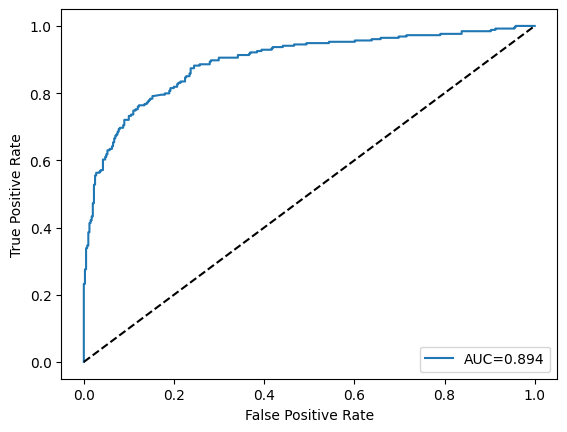

In [30]:
auc = metrics.roc_auc_score(y_test, y_pred_svm_proba)
auc = "{:.3f}".format(auc)
fprSVC, tprSVC, _ = metrics.roc_curve(y_test, y_pred_svm_proba)
plt.plot(fprSVC, tprSVC, label="AUC="+ auc)
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.rcParams["figure.figsize"] = (7,5)
plt.show()

In [31]:
print(classification_report(y_test, y_pred_svm, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       401
           1       0.83      0.72      0.77       254

    accuracy                           0.84       655
   macro avg       0.84      0.81      0.82       655
weighted avg       0.84      0.84      0.83       655



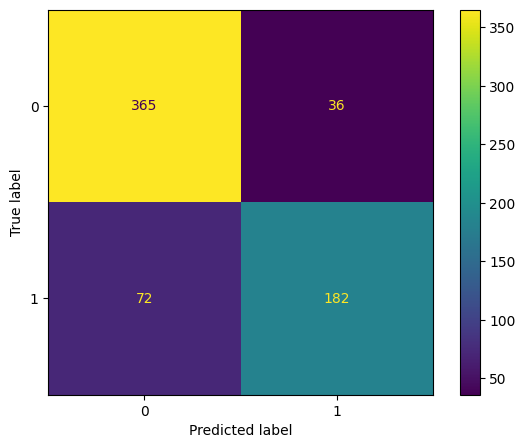

In [32]:
cm = confusion_matrix(y_test, y_pred_svm,  labels=[0,1])
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

# Logistic Regression

In [33]:
param_grid = {
    'model__max_iter': [500, 1000],
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('model', LogisticRegression())  # Modeling step
])

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [34]:
best_params

{'model__max_iter': 500}

In [35]:
pipe = Pipeline([("preprocessor", StandardScaler()),('logReg', LogisticRegression(max_iter=best_params["model__max_iter"]))])
pipe.fit(X_train, y_train)
y_predlr = pipe.predict(X_test)
y_predlr_proba = pipe.predict_proba(X_test)[:,1]

In [36]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predlr))
print("Precision:",metrics.precision_score(y_test, y_predlr))
print("Recall:",metrics.recall_score(y_test, y_predlr))

Accuracy: 0.8030534351145038
Precision: 0.7376425855513308
Recall: 0.7637795275590551


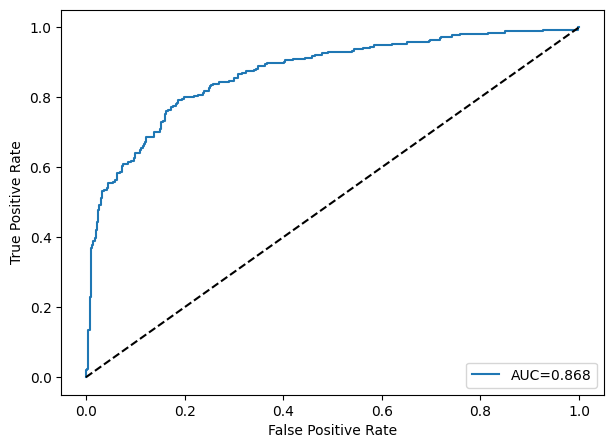

In [37]:
auc = metrics.roc_auc_score(y_test, y_predlr_proba)
auc = "{:.3f}".format(auc)
fprLR, tprLR, _ = metrics.roc_curve(y_test, y_predlr_proba)
plt.plot(fprLR, tprLR, label="AUC="+ auc)
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.rcParams["figure.figsize"] = (7,5)
plt.show()

In [38]:
print(classification_report(y_test, y_predlr, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       401
           1       0.74      0.76      0.75       254

    accuracy                           0.80       655
   macro avg       0.79      0.80      0.79       655
weighted avg       0.80      0.80      0.80       655



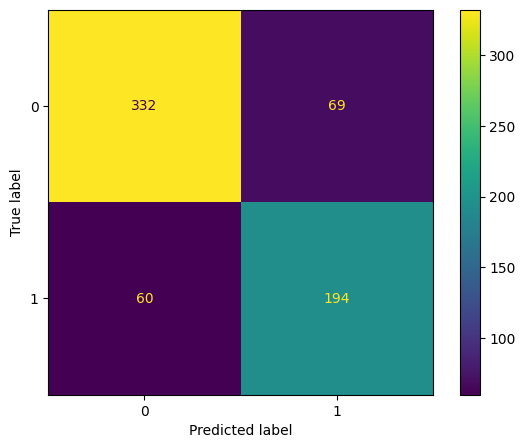

In [39]:
cm = confusion_matrix(y_test, y_predlr)
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

# Bagging

In [40]:
param_grid = {
    'model__n_estimators': [50, 100, 200, 300],
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('model', BaggingClassifier())  # Modeling step
])

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [41]:
best_params

{'model__n_estimators': 300}

In [42]:
pipe = Pipeline([("std", StandardScaler()), ('baggC', BaggingClassifier(n_estimators=best_params["model__n_estimators"]))])
pipe.fit(X_train, y_train)
y_pred_bc = pipe.predict(X_test)
y_pred_bc_proba = pipe.predict_proba(X_test)[:,1]

In [43]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_bc))
print("Precision:",metrics.precision_score(y_test, y_pred_bc))
print("Recall:",metrics.recall_score(y_test, y_pred_bc))

Accuracy: 0.8427480916030534
Precision: 0.8355555555555556
Recall: 0.7401574803149606


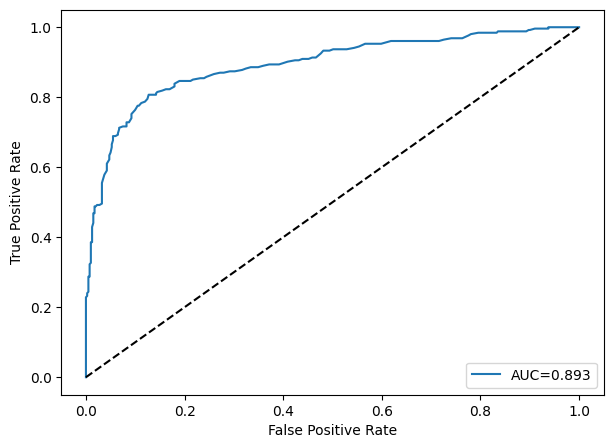

In [44]:
auc = metrics.roc_auc_score(y_test, y_pred_bc_proba)
auc = "{:.3f}".format(auc)
fprBAGGING, tprBAGGING, _ = metrics.roc_curve(y_test, y_pred_bc_proba)
plt.plot(fprBAGGING, tprBAGGING, label="AUC="+ auc)
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [45]:
print(classification_report(y_test, y_pred_bc, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       401
           1       0.84      0.74      0.78       254

    accuracy                           0.84       655
   macro avg       0.84      0.82      0.83       655
weighted avg       0.84      0.84      0.84       655



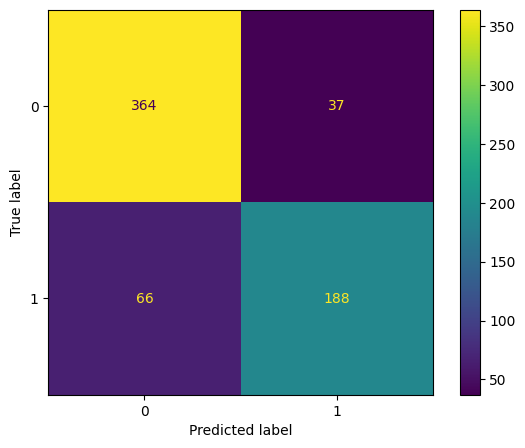

In [46]:
cm = confusion_matrix(y_test, y_pred_bc)
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

# Adaboost

In [47]:
param_grid = {
    'model__n_estimators': [50, 100, 200, 300],
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('model', AdaBoostClassifier())  # Modeling step
])

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [48]:
best_params["model__n_estimators"]

100

In [49]:
pipe = Pipeline([('std', StandardScaler()), ('ada', AdaBoostClassifier(n_estimators=best_params["model__n_estimators"], random_state=42))])
pipe.fit(X_train, y_train)
y_predada = pipe.predict(X_test) 
y_predada_proba = pipe.predict_proba(X_test)[:,1]

In [50]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predada))
print("Precision:",metrics.precision_score(y_test, y_predada))
print("Recall:",metrics.recall_score(y_test, y_predada))

Accuracy: 0.7465648854961832
Precision: 0.662962962962963
Recall: 0.7047244094488189


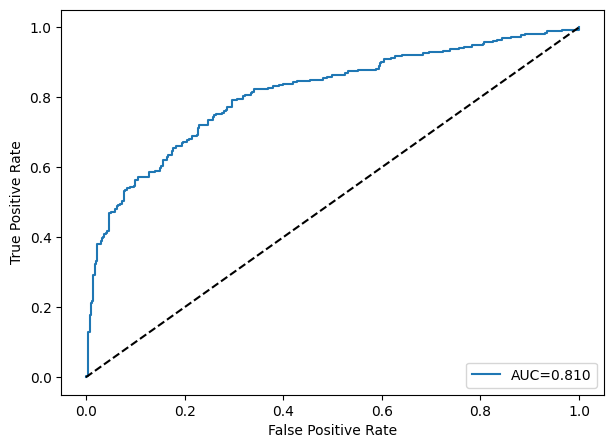

In [51]:
auc = metrics.roc_auc_score(y_test, y_predada_proba)
auc = "{:.3f}".format(auc)
fprADA, tprADA, _ = metrics.roc_curve(y_test, y_predada_proba)
plt.plot(fprADA, tprADA, label="AUC="+ auc)
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [52]:
print(classification_report(y_test, y_predada))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       401
           1       0.66      0.70      0.68       254

    accuracy                           0.75       655
   macro avg       0.73      0.74      0.74       655
weighted avg       0.75      0.75      0.75       655



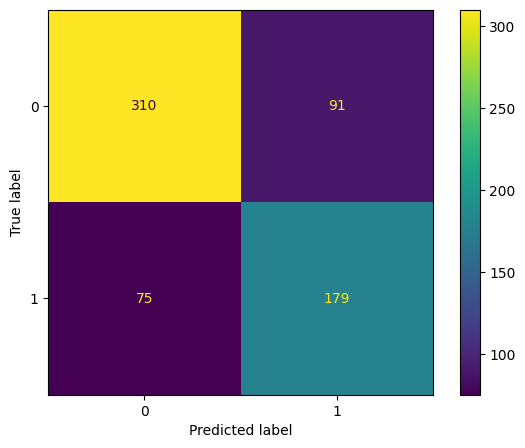

In [53]:
cm = confusion_matrix(y_test, y_predada)
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

# Naives Bayes

In [54]:
param_grid = {
    'model__priors': [None],
    'model__var_smoothing': np.logspace(0,-9, num=100)
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('model', GaussianNB())  # Modeling step
])

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [55]:
best_params

{'model__priors': None, 'model__var_smoothing': 0.2848035868435802}

In [56]:
pipe = Pipeline([("scaler", StandardScaler()),('gnb', GaussianNB(priors=best_params["model__priors"], var_smoothing=best_params["model__var_smoothing"]))])
pipe.fit(X_train, y_train)
y_prednb = pipe.predict(X_test)
y_prednb_proba = pipe.predict_proba(X_test)[:,1]

In [57]:
print("Accuracy:",metrics.accuracy_score(y_test, y_prednb))
print("Precision:",metrics.precision_score(y_test, y_prednb))
print("Recall:",metrics.recall_score(y_test, y_prednb))

Accuracy: 0.751145038167939
Precision: 0.7040358744394619
Recall: 0.6181102362204725


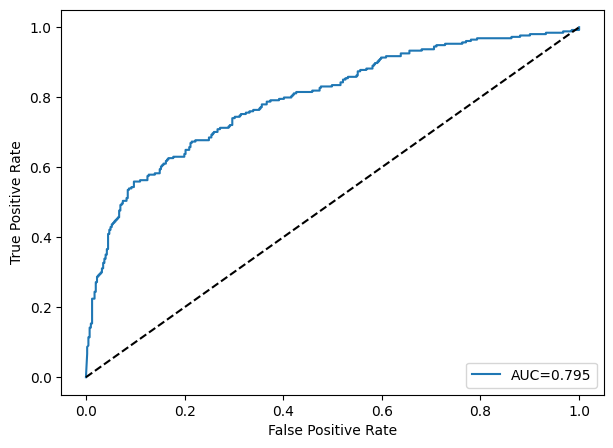

In [58]:
auc = metrics.roc_auc_score(y_test, y_prednb_proba)
auc = "{:.3f}".format(auc)
fprNB, tprNB, _ = metrics.roc_curve(y_test, y_prednb_proba)
plt.plot(fprNB, tprNB, label="AUC="+ auc)
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [59]:
print(classification_report(y_test, y_prednb, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.78      0.84      0.80       401
           1       0.70      0.62      0.66       254

    accuracy                           0.75       655
   macro avg       0.74      0.73      0.73       655
weighted avg       0.75      0.75      0.75       655



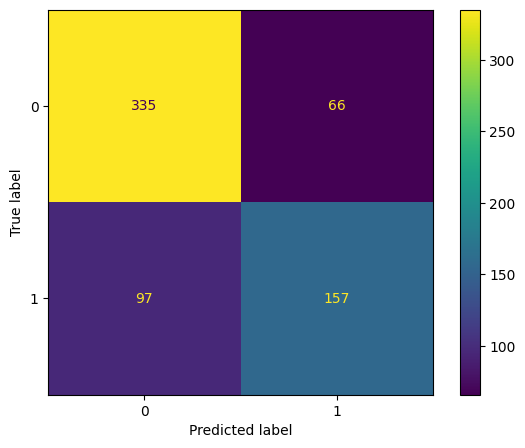

In [60]:
cm = confusion_matrix(y_test, y_prednb)
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

# KNN

In [61]:
arr = np.arange(1, 100, 1)

param_grid = [{
    'model__n_neighbors': arr,
    'model__leaf_size': [20, 30, 40],
    'model__weights': ['uniform', 'distance']
}]

knn = KNeighborsClassifier()

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('model', KNeighborsClassifier())  # Modeling step
])

In [62]:
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [ ]:
print(f"The best params are :: n_neighbors = {best_params['model__n_neighbors']} , leaf_size= {best_params['model__leaf_size']}, weights= {best_params['model__weights']}")

The best params are :: n_neighbors = 50 , leaf_size= 20, weights= uniform


In [ ]:
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('model', KNeighborsClassifier(n_neighbors=best_params["model__n_neighbors"],  
                                     leaf_size=best_params["model__leaf_size"],
                                     weights=best_params["model__weights"] ))  # Modeling step
])

In [ ]:
pipe.fit(X_train, y_train)
y_predknn = pipe.predict(X_test)
y_predknn_proba = pipe.predict_proba(X_test)[:,1]

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predknn))
print("Precision:",metrics.precision_score(y_test, y_predknn))
print("Recall:",metrics.recall_score(y_test, y_predknn))

Accuracy: 0.7877862595419848
Precision: 0.8874172185430463
Recall: 0.5234375


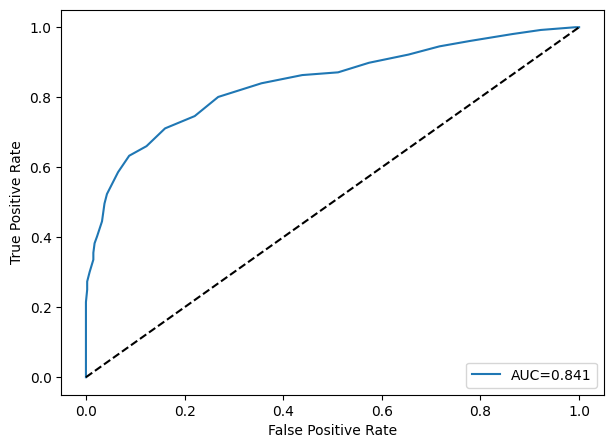

In [ ]:
auc = metrics.roc_auc_score(y_test, y_predknn_proba)
auc = "{:.3f}".format(auc)
fprKNN, tprKNN, _ = metrics.roc_curve(y_test, y_predknn_proba)
plt.plot(fprKNN, tprKNN, label="AUC="+ auc)
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
print(classification_report(y_test, y_predknn, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85       399
           1       0.89      0.52      0.66       256

    accuracy                           0.79       655
   macro avg       0.82      0.74      0.75       655
weighted avg       0.81      0.79      0.77       655



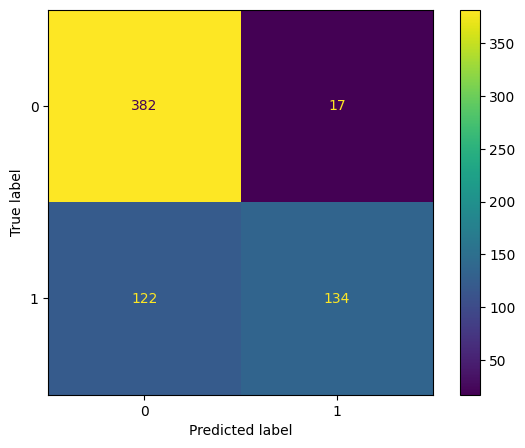

In [ ]:
cm = confusion_matrix(y_test, y_predknn)
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

# Random Forest

In [ ]:
param_grid = [{
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 5, 10],
    'model__min_samples_split': [2, 5, 10]
}]

rf = RandomForestClassifier()
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('model', RandomForestClassifier())  # Modeling step
])

In [ ]:
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [ ]:
print(f"The best params are :: n_estimators = {best_params['model__n_estimators']} , max_depth = {best_params['model__max_depth']}, min_samples_split = {best_params['model__min_samples_split']}")

The best params are :: n_estimators = 300 , max_depth = None, min_samples_split = 10


In [ ]:
pipefinal = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('model', RandomForestClassifier(n_estimators=best_params["model__n_estimators"],  
                                     max_depth=best_params["model__max_depth"], 
                                     min_samples_split=best_params["model__min_samples_split"], 
                                     random_state=42))  # Modeling step
])
pipefinal.fit(X_train, y_train)
y_predrf = pipefinal.predict(X_test)
y_predrf_proba = pipefinal.predict_proba(X_test)[:,1]

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predrf))
print("Precision:",metrics.precision_score(y_test, y_predrf))
print("Recall:",metrics.recall_score(y_test, y_predrf))

Accuracy: 0.8259541984732824
Precision: 0.8317757009345794
Recall: 0.6953125


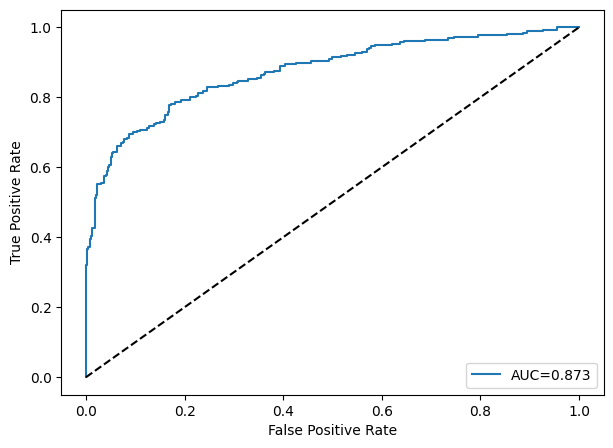

In [ ]:
auc = metrics.roc_auc_score(y_test, y_predrf_proba)
auc = "{:.3f}".format(auc)
fprRF, tprRF, _ = metrics.roc_curve(y_test, y_predrf_proba)
plt.plot(fprRF, tprRF, label="AUC="+ auc)
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
print(classification_report(y_test, y_predrf, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       399
           1       0.83      0.70      0.76       256

    accuracy                           0.83       655
   macro avg       0.83      0.80      0.81       655
weighted avg       0.83      0.83      0.82       655



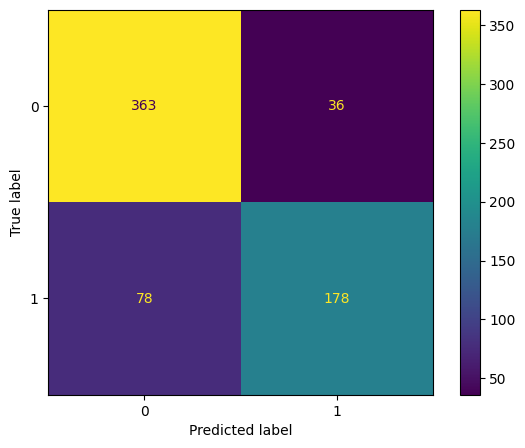

In [ ]:
cm = confusion_matrix(y_test, y_predrf)
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

# Benchmark

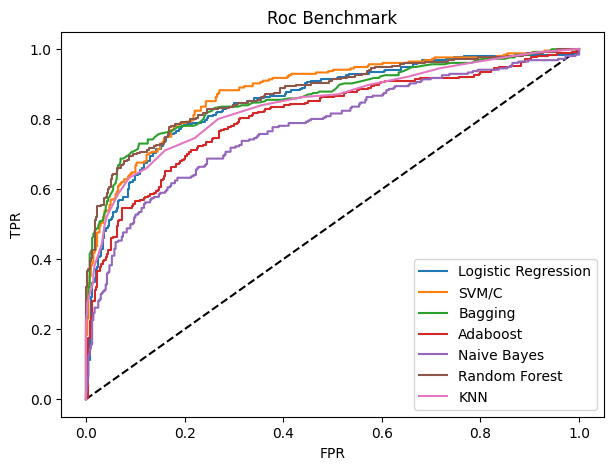

In [ ]:
plt.plot([0,1],[0,1], "k--")
plt.plot(fprLR, tprLR, label= "Logistic Regression")
plt.plot(fprSVC, tprSVC, label= "SVM/C")
plt.plot(fprBAGGING, tprBAGGING, label= "Bagging")
plt.plot(fprADA, tprADA, label= "Adaboost")
plt.plot(fprNB, tprNB, label= "Naive Bayes")
plt.plot(fprRF, tprRF, label= "Random Forest")
plt.plot(fprKNN, tprKNN, label= "KNN")

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Roc Benchmark')
plt.rcParams["figure.figsize"] = (20,10)
plt.show()